#  Travaux pratiques

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")

##  Visualisation univariée
### Prédicteur quantitatif

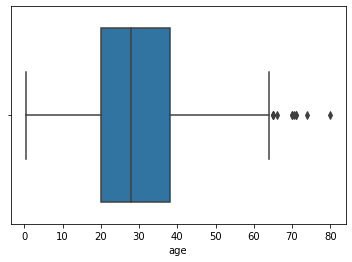

In [3]:
# Q1
sns.boxplot(x=titanic["age"])
plt.show()

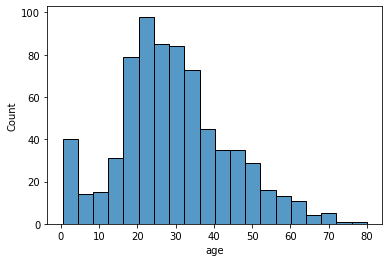

In [4]:
# Q2
sns.histplot(x=titanic.age)
plt.show()

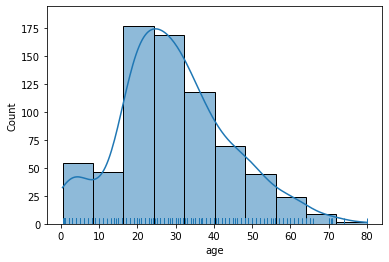

In [5]:
sns.histplot(x=titanic.age, bins=10, kde=True)
sns.rugplot(titanic.age)
plt.show()

### Prédicteur qualitatif

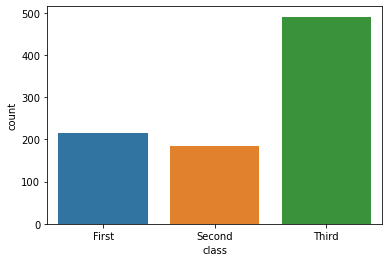

In [6]:
# Q3
sns.countplot(data=titanic, x="class")
plt.show()

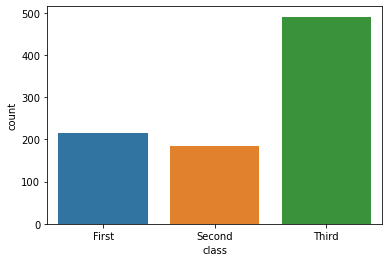

In [7]:
sns.countplot(x=titanic["class"])
plt.show()

## Visualisation multivariée
### Quantitatif vs quantitatif
#### Diagramme de dispersion

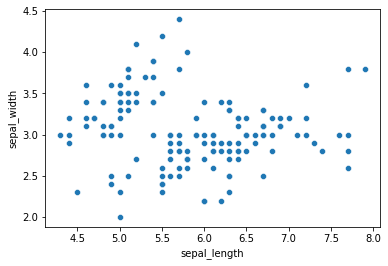

In [8]:
# Q4
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris)
plt.show()

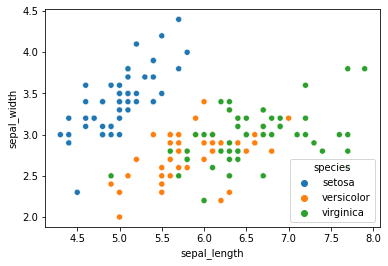

In [9]:
# Q5
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=iris)
# hue: Variable sémantique qui est mappée pour déterminer la couleur 
# des éléments du plot.
plt.show()

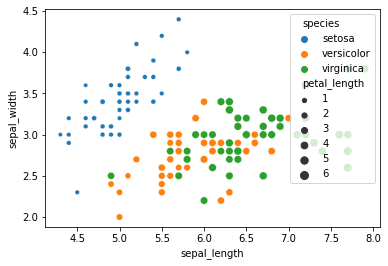

In [10]:
# Q6
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species",size="petal_length", data=iris)
plt.show()

#### Diagramme de corrélation

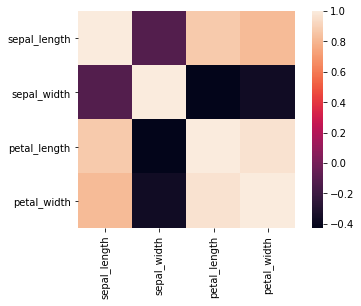

In [11]:
# Q7
corr = iris.corr()
sns.heatmap(corr, square=True)
plt.show()

### Qualitatif vs quantitatif
#### Diagramme en barres avec dispersion

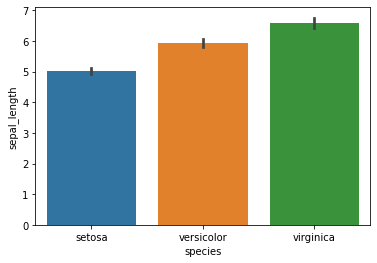

In [12]:
# Q8
sns.barplot(x="species", y="sepal_length", data=iris)
plt.show()

#### Boites à moustaches multiples

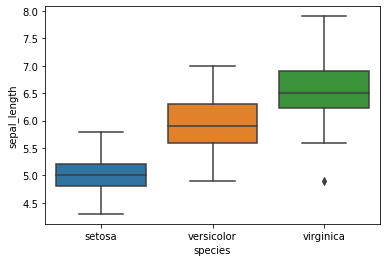

In [13]:
# Q9
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.show()

### Qualitatif vs qualitatif

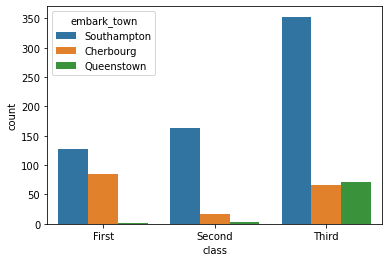

In [14]:
# Q10
sns.countplot(x="class", hue="embark_town", data=titanic)
plt.show()

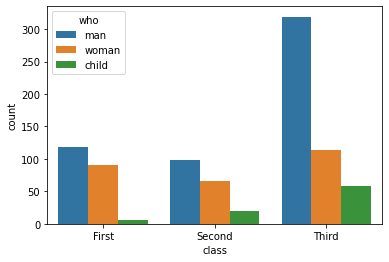

In [15]:
# Q11
sns.countplot(x="class", hue="who", data=titanic)
plt.show()

### Représentation multiple

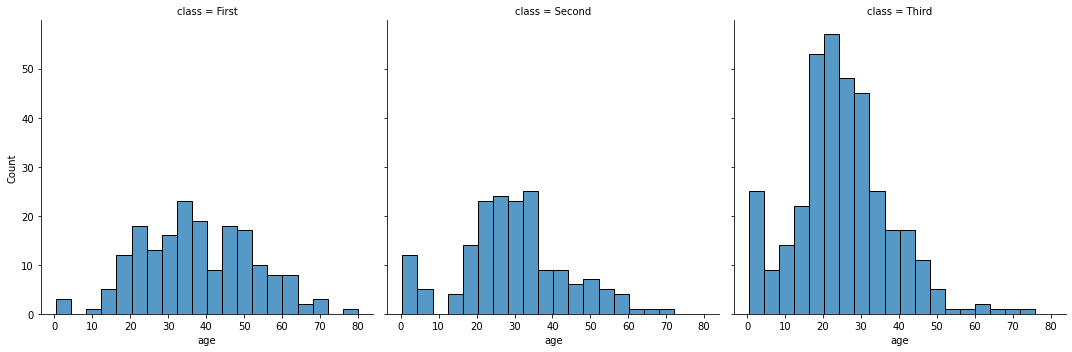

In [16]:
# Q12
sns.displot(x="age", col="class", kind="hist", data=titanic)
plt.show()

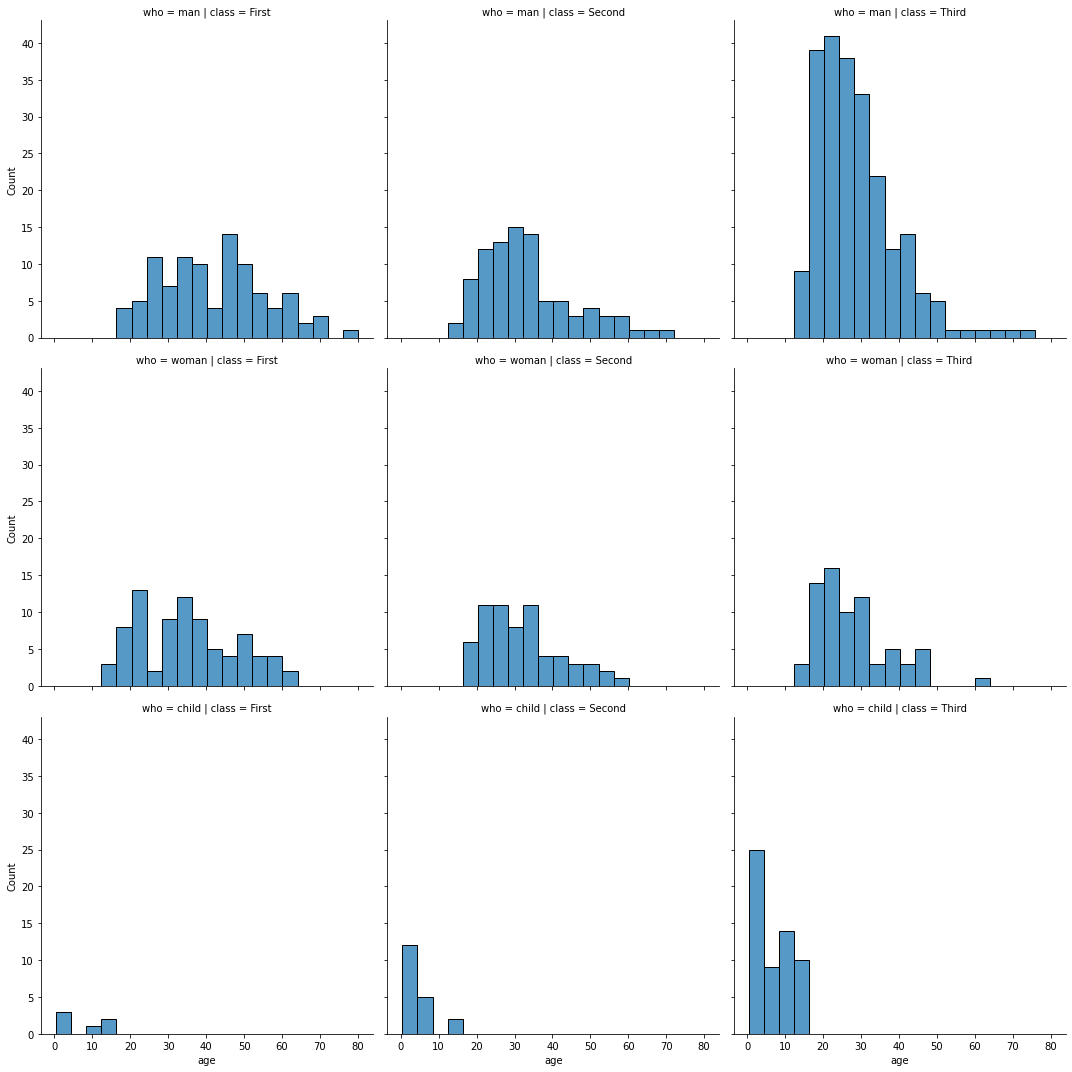

In [17]:
# Q13
sns.displot(x="age", col="class", row="who", kind="hist", data=titanic)
plt.show()

## Visualisation du jeu de données sy02-p2019.csv

In [ ]:
# Q14
import pandas as pd
X = pd.read_csv("TP02_Analyse_exploratoire/data/sy02-p2019.csv")
X["Note médian"].dtype

In [ ]:
X = pd.read_csv("TP02_Analyse_exploratoire/data/sy02-p2019.csv", na_values="ABS")
X["Note médian"].dtype

In [ ]:
# Q15
sns.countplot(x="Branche", hue="Semestre", data=X)
plt.show()

In [ ]:
X["Note ECTS"] = pd.Categorical(X["Note ECTS"], ordered=True)
sns.countplot(x="Branche", hue="Note ECTS", data=X)
plt.show()

In [ ]:
# Q16
sns.histplot(X["Note médian"])
plt.show()

In [ ]:
sns.histplot(X["Note final"])
plt.show()

In [ ]:
sns.scatterplot(x="Note médian", y="Note final", data=X)
plt.show()

In [ ]:
sns.jointplot(x="Note médian", y="Note final", data=X)
plt.show()

In [ ]:
# Q17
# print(X)
X1 = X.melt(
value_vars=["Note médian", "Note final"], 
var_name="Type",
value_name="Note"
)
print(X1)
sns.boxplot(x="Type", y="Note", data=X1)
plt.show()

In [ ]:
# Q18
X["Même correcteur"] = X["Correcteur médian"] == X["Correcteur final"]
X1 = X.melt(
id_vars=["Même correcteur"],
value_vars=["Correcteur final", "Correcteur médian"],
var_name="Examen",
value_name="Correcteur",
)
print(X1)
sns.countplot(x="Correcteur", hue="Même correcteur", data=X1)
plt.show()

In [ ]:
# Q19
import numpy as np
X1 = X.rename(columns={"Correcteur médian": "médian", "Correcteur final": "final"})
X1 = X1.melt(
value_vars=["médian", "final"],
var_name="Examen",
value_name="Correcteur",
)
print(X1)
sns.countplot(x="Correcteur", hue="Examen", data=X1)
plt.show()

# Exercices

In [ ]:
from sklearn.metrics import pairwise_distances as pedist

def wgcomp(distXY, h):
    wgts = np.exp(-distXY/(2*h))
    return wgts

def kdens(X, Y, h):
    distXY = pedist(X,Y)
    weights = wgcomp(distXY, h)
    dens = np.mean(weights/np.sqrt(2*np.pi)/np.sqrt(h),axis=0)
    return dens

def loglike(h, X, Y):
    dens = kdens(X, Y, h)
    logl = np.sum(np.log(dens))
    return logl

In [ ]:
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt


X = np.append(spst.norm.rvs(loc=0,scale=1, size=30),spst.norm.rvs(loc=5,scale=0.85, size=20))
X.shape = (X.shape[0],1)
Y = np.append(spst.norm.rvs(loc=0,scale=1, size=15),spst.norm.rvs(loc=5,scale=0.85, size=10))
Y.shape = (Y.shape[0],1)
distXY = pedist(X, Y)
hcur = spst.uniform.rvs()*5
hprv = np.inf
hini = hcur

while np.abs(hcur-hprv)>1e-10:
    hprv = hcur
    wgts = wgcomp(distXY, hcur)
    hcur = np.sqrt(np.mean(np.sum(wgts*distXY**2,axis=0)/np.sum(wgts,axis=0)))

# affichage
hplt = np.linspace(start=0.01, stop=5, num=500)
Z = np.linspace(start=-5, stop=10, num=1501)
fig, axs = plt.subplots(1, 2)
axs[0].plot(hplt, [loglike(h, X, Y) for h in hplt])
axs[1].plot(Z, kdens(X, Z.reshape((Z.shape[0], 1)), hcur))

In [ ]:
def sqdistloo(X):
    X2 = np.linalg.norm(X, axis=1, keepdims=True)**2
    distXXloo = np.tile(X2, (1,X.shape[0])) + np.tile(X2.T,(X.shape[0],1)) - 2*X@X.T
    distXXloo = distXXloo[~np.eye(len(distXXloo), dtype=bool)].reshape(len(distXXloo), -1)
    return distXXloo

def kdensloo(X, h):
    distXX = sqdistloo(X)
    weights = wgcomp(distXX, h)
    dens = np.mean(weights/np.sqrt(2*np.pi)/np.sqrt(h),axis=0)
    return dens

def loglikeloo(h, X):
    dens = kdensloo(X, h)
    logl = np.sum(np.log(dens))
    return logl

In [ ]:
distXXloo = sqdistloo(X)
hcur_ = hini
hprv = np.inf

while np.abs(hcur_-hprv)>1e-10:
    hprv = hcur_
    wgts = wgcomp(distXXloo, hcur_)
    hcur_ = np.mean(np.sum(distXXloo*wgts,axis=0)/np.sum(wgts,axis=0))

fig, axs = plt.subplots(2, 2)
axs[0,0].plot(hplt, [loglike(h, X, Y) for h in hplt])
axs[0,1].plot(Z, kdens(X, Z.reshape((Z.shape[0],1)), hcur))
axs[1,0].plot(hplt, [loglikeloo(h, X) for h in hplt])
axs[1,1].plot(Z, kdens(X, Z.reshape((Z.shape[0],1)), hcur_))
plt.show()